<a href="https://colab.research.google.com/github/housemLassoued/ML-deployment/blob/main/Forecasting_energy_consumption__Using_ML_Models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
!pip install holidays
import holidays


In [ ]:
df= pd.read_csv('/content/585.csv', sep=';')

In [ ]:
df.head()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2
0,31/12/2016 23:50:00,879852
1,01/01/2017 00:00:00,879852
2,01/01/2017 00:10:00,879871
3,01/01/2017 00:20:00,879881
4,01/01/2017 00:30:00,879890


In [ ]:
df.tail()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2
52695,01/01/2018 23:20:00,1581261
52696,01/01/2018 23:30:00,1581270
52697,01/01/2018 23:40:00,1581278
52698,01/01/2018 23:50:00,1581286
52699,02/01/2018 00:00:00,1581295


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52700 entries, 0 to 52699
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         52700 non-null  object
 1   Td SC-BT-585-ARM-BAT-TGBT_2  52700 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 823.6+ KB


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-33-182e23b44254>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
# Filtrage pour ne garder que les échantillons de l'année 2017
df_filtered = df[(df['Date'].dt.year == 2017)]


In [ ]:
df_filtered.head()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2
1,2017-01-01 00:00:00,879852
2,2017-01-01 00:10:00,879871
3,2017-01-01 00:20:00,879881
4,2017-01-01 00:30:00,879890
5,2017-01-01 00:40:00,879900


In [ ]:
df_filtered.tail()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2
52550,2017-12-31 23:10:00,1579938
52551,2017-12-31 23:20:00,1579947
52552,2017-12-31 23:30:00,1579955
52553,2017-12-31 23:40:00,1579964
52554,2017-12-31 23:50:00,1579972


In [ ]:
df_filtered['Month']=df_filtered['Date'].dt.month
df_filtered['Day']=df_filtered['Date'].dt.day
df_filtered['Hour']=df_filtered['Date'].dt.hour
df_filtered['Minute']=df_filtered['Date'].dt.minute


<ipython-input-37-257a600e7503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Month']=df_filtered['Date'].dt.month
<ipython-input-37-257a600e7503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Day']=df_filtered['Date'].dt.day
<ipython-input-37-257a600e7503>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
df_filtered.head()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2,Month,Day,Hour,Minute
1,2017-01-01 00:00:00,879852,1,1,0,0
2,2017-01-01 00:10:00,879871,1,1,0,10
3,2017-01-01 00:20:00,879881,1,1,0,20
4,2017-01-01 00:30:00,879890,1,1,0,30
5,2017-01-01 00:40:00,879900,1,1,0,40


In [ ]:
df_filtered.tail()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2,Month,Day,Hour,Minute
52550,2017-12-31 23:10:00,1579938,12,31,23,10
52551,2017-12-31 23:20:00,1579947,12,31,23,20
52552,2017-12-31 23:30:00,1579955,12,31,23,30
52553,2017-12-31 23:40:00,1579964,12,31,23,40
52554,2017-12-31 23:50:00,1579972,12,31,23,50


In [ ]:
monthly_avg = df_filtered.groupby('Month').mean()
monthly_avg

,Date,Td SC-BT-585-ARM-BAT-TGBT_2,Day,Hour,Minute
Month,,,,,
1,2017-01-16 11:55:00.133288448,9.103741e+05,16.000000,11.500000,25.0
2,2017-02-14 23:55:00.145089280,9.681064e+05,14.500000,11.500000,25.0
3,2017-03-16 11:36:23.318977280,1.024832e+06,15.986541,11.512786,25.0
4,2017-04-15 23:55:00.130787072,1.078472e+06,15.500000,11.500000,25.0
5,2017-05-16 11:55:00.128808192,1.126994e+06,16.000000,11.500000,25.0
6,2017-06-15 23:55:00.127083264,1.198197e+06,15.500000,11.500000,25.0
7,2017-07-16 11:55:00.129704192,1.274255e+06,16.000000,11.500000,25.0
8,2017-08-16 11:55:00.130376192,1.331701e+06,16.000000,11.500000,25.0
9,2017-09-15 23:55:00.126157312,1.393505e+06,15.500000,11.500000,25.0


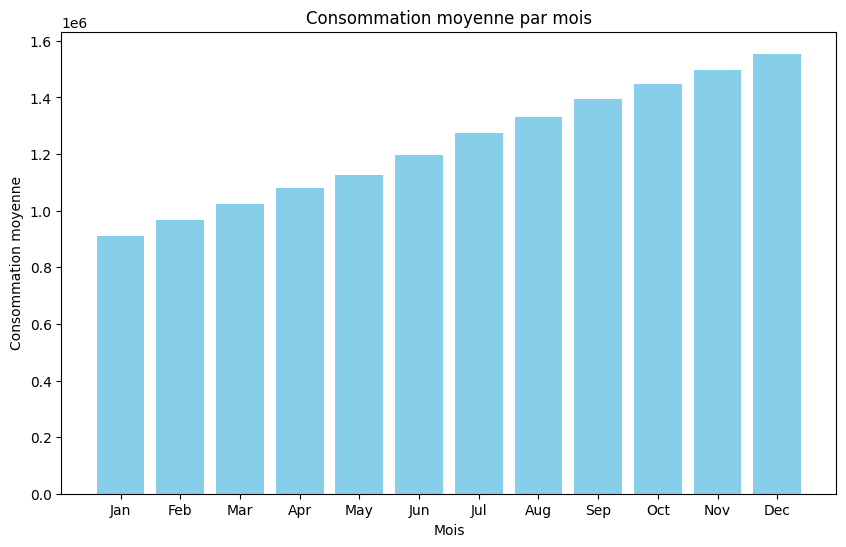

In [ ]:

plt.figure(figsize=(10,6))
plt.bar(monthly_avg.index, monthly_avg['Td SC-BT-585-ARM-BAT-TGBT_2'], color='skyblue')
plt.xlabel('Mois')
plt.ylabel('Consommation moyenne')
plt.title('Consommation moyenne par mois')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
daily_avg = df_filtered.groupby(['Month','Day']).mean()
daily_avg

Date  Td SC-BT-585-ARM-BAT-TGBT_2  Hour  \
Month Day                                                                    
1     1   2017-01-01 11:55:00.104166656                 8.805321e+05  11.5   
      2   2017-01-02 11:55:00.124999936                 8.819225e+05  11.5   
      3   2017-01-03 11:55:00.118055680                 8.837785e+05  11.5   
      4   2017-01-04 11:55:00.124999936                 8.860267e+05  11.5   
      5   2017-01-05 11:55:00.173611008                 8.882398e+05  11.5   
...                                 ...                          ...   ...   
12    27  2017-12-27 11:55:00.118055680                 1.574245e+06  11.5   
      28  2017-12-28 11:55:00.166666752                 1.575552e+06  11.5   
      29  2017-12-29 11:55:00.118055680                 1.576837e+06  11.5   
      30  2017-12-30 11:55:00.131944448                 1.578123e+06  11.5   
      31  2017-12-31 11:55:00.131944448                 1.579355e+06  11.5   

           Minute  
Month Day          
1     1      25.0  
      2      25.0  
      3      25.0  
      4      25.0  
      5      25.0  
...           ...  
12    27     25.0  
      28     25.0  
      29     25.0  
      30     25.0  
      31     25.0  

[365 rows x 4 columns]

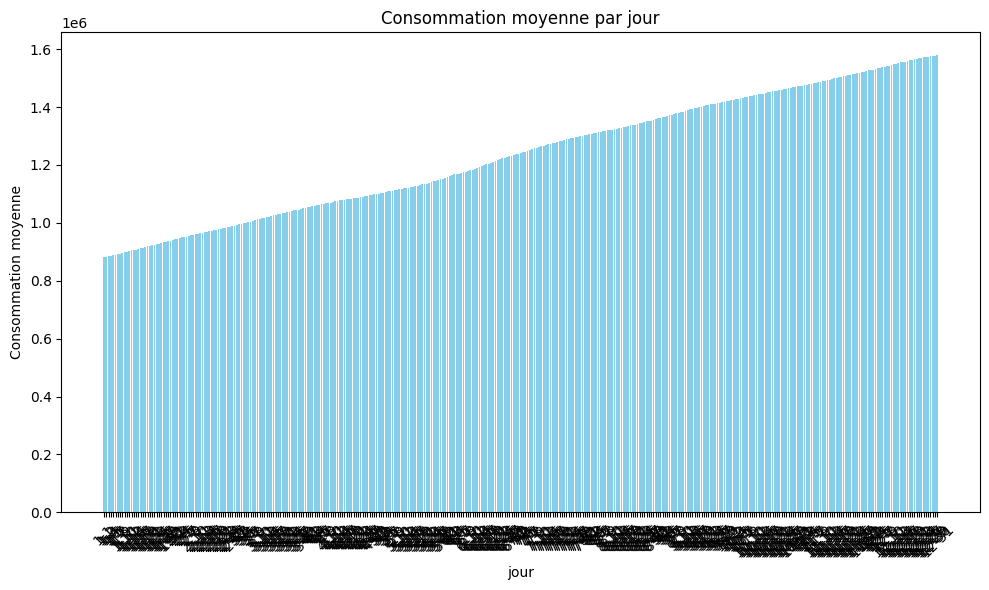

In [ ]:
plt.figure(figsize=(10,6))


x_values = ['-'.join(str(val) for val in index) for index in daily_avg.index]

plt.bar(x_values, daily_avg['Td SC-BT-585-ARM-BAT-TGBT_2'], color='skyblue')
plt.xlabel('jour')
plt.ylabel('Consommation moyenne')
plt.title('Consommation moyenne par jour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

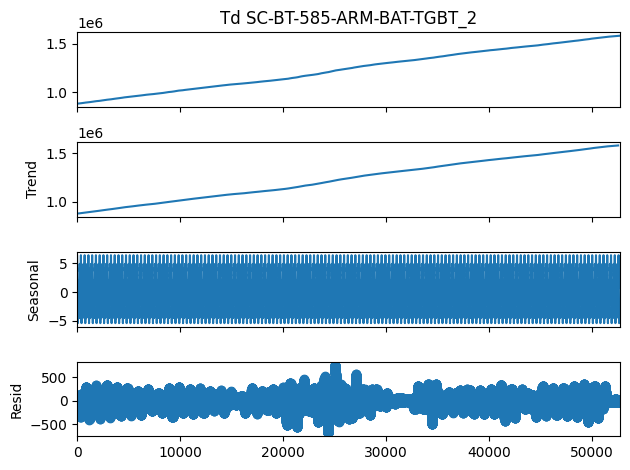

In [ ]:
# Appliquer la décomposition (modèle additif ou multiplicatif)
decomposition = seasonal_decompose(df['Td SC-BT-585-ARM-BAT-TGBT_2'], model='additive', period=365)

# Affichage des composantes
decomposition.plot()
plt.show()

In [ ]:
df_filtered['day_of_week'] = df_filtered['Date'].dt.dayofweek


<ipython-input-45-1d6718703c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['Date'].dt.dayofweek


In [ ]:
df_filtered['day_of_week'] = (df_filtered['day_of_week'] + 1) % 7

<ipython-input-46-cfa99869e143>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = (df_filtered['day_of_week'] + 1) % 7


In [ ]:
df_filtered['day_of_week'] = df_filtered['Date'].dt.strftime('%A')

<ipython-input-47-6cf21f33ccfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['Date'].dt.strftime('%A')


In [ ]:
df_filtered['day_of_week'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [ ]:
# Ajouter une colonne 'weekend', qui prend 1 pour samedi et dimanche, 0 pour les autres jours
df_filtered['weekend'] = df_filtered['day_of_week'].apply(lambda x: 1 if x in ['Sunday'] else 0)


<ipython-input-49-2a4c5cc89071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['weekend'] = df_filtered['day_of_week'].apply(lambda x: 1 if x in ['Sunday'] else 0)


In [ ]:
fr_holidays = holidays.France()
# Ajouter une colonne 'holiday', qui prend 1 pour les jours fériés en France, sinon 0
df_filtered['holiday'] = df_filtered['Date'].dt.date.apply(lambda x: 1 if x in fr_holidays else 0)


<ipython-input-50-9759930b92ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['holiday'] = df_filtered['Date'].dt.date.apply(lambda x: 1 if x in fr_holidays else 0)


In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Hiver'
    elif month in [3, 4, 5]:
        return 'Printemps'
    elif month in [6, 7, 8]:
        return 'Été'
    elif month in [9, 10, 11]:
        return 'Automne'

In [ ]:
df_filtered['Season'] = df_filtered['Date'].dt.month.apply(get_season)

<ipython-input-52-a646764ea0ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Season'] = df_filtered['Date'].dt.month.apply(get_season)


In [ ]:
df_filtered.head()

,Date,Td SC-BT-585-ARM-BAT-TGBT_2,Month,Day,Hour,Minute,day_of_week,weekend,holiday,Season
1,2017-01-01 00:00:00,879852,1,1,0,0,Sunday,1,1,Hiver
2,2017-01-01 00:10:00,879871,1,1,0,10,Sunday,1,1,Hiver
3,2017-01-01 00:20:00,879881,1,1,0,20,Sunday,1,1,Hiver
4,2017-01-01 00:30:00,879890,1,1,0,30,Sunday,1,1,Hiver
5,2017-01-01 00:40:00,879900,1,1,0,40,Sunday,1,1,Hiver


In [ ]:
df_filtered.set_index('Date', inplace=True)

In [ ]:
lag=[30, 60, 90 , 120 , 150 , 180 ]
alpha=[0.95 , 0.75 ,0.5 , 0.3 , 0.2 , 0.1]
for i in range(len(lag)):
  for j in range(len(alpha)):
    column_name = f'Td SC-BT-585-ARM-BAT-TGBT_2_lag_{lag[i]}_alpha_{alpha[j]}'
    df_filtered[column_name] = df_filtered['Td SC-BT-585-ARM-BAT-TGBT_2'].ewm(alpha=alpha[j], adjust=False).mean().shift(lag[i])
    df_filtered[column_name] = df_filtered[column_name].fillna(0)

<ipython-input-59-8ef8557e8ca7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column_name] = df_filtered['Td SC-BT-585-ARM-BAT-TGBT_2'].ewm(alpha=alpha[j], adjust=False).mean().shift(lag[i])
<ipython-input-59-8ef8557e8ca7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column_name] = df_filtered[column_name].fillna(0)
<ipython-input-59-8ef8557e8ca7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [ ]:
df_filtered.head()

,Td SC-BT-585-ARM-BAT-TGBT_2,Month,Day,Hour,Minute,day_of_week,weekend,holiday,Season,lag_30,...,Td SC-BT-585-ARM-BAT-TGBT_2_lag_150_alpha_0.5,Td SC-BT-585-ARM-BAT-TGBT_2_lag_150_alpha_0.3,Td SC-BT-585-ARM-BAT-TGBT_2_lag_150_alpha_0.2,Td SC-BT-585-ARM-BAT-TGBT_2_lag_150_alpha_0.1,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.95,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.75,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.5,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.3,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.2,Td SC-BT-585-ARM-BAT-TGBT_2_lag_180_alpha_0.1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,879852,1,1,0,0,Sunday,1,1,Hiver,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:10:00,879871,1,1,0,10,Sunday,1,1,Hiver,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:20:00,879881,1,1,0,20,Sunday,1,1,Hiver,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:30:00,879890,1,1,0,30,Sunday,1,1,Hiver,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 00:40:00,879900,1,1,0,40,Sunday,1,1,Hiver,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52554 entries, 2017-01-01 00:00:00 to 2017-12-31 23:50:00
Data columns (total 57 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Td SC-BT-585-ARM-BAT-TGBT_2                     52554 non-null  int64  
 1   Month                                           52554 non-null  int32  
 2   Day                                             52554 non-null  int32  
 3   Hour                                            52554 non-null  int32  
 4   Minute                                          52554 non-null  int32  
 5   day_of_week                                     52554 non-null  object 
 6   weekend                                         52554 non-null  int64  
 7   holiday                                         52554 non-null  int64  
 8   Season                                          52554 non-null  object 
 9   lag_

In [ ]:
for col in df_filtered.columns:

    if df_filtered[col].isnull().any():

        df_filtered[col].fillna(df_filtered[col].mean(), inplace=True)

<ipython-input-64-ce550afb8c60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col].fillna(df_filtered[col].mean(), inplace=True)


In [ ]:
df_filtered.isnull().sum()

,0
Td SC-BT-585-ARM-BAT-TGBT_2,0
Month,0
Day,0
Hour,0
Minute,0
day_of_week,0
weekend,0
holiday,0
Season,0
lag_30,0


In [ ]:
df_filtered= pd.get_dummies(df_filtered, columns=['day_of_week', 'Season'], drop_first=True)

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52554 entries, 2017-01-01 00:00:00 to 2017-12-31 23:50:00
Data columns (total 64 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Td SC-BT-585-ARM-BAT-TGBT_2                     52554 non-null  int64  
 1   Month                                           52554 non-null  int32  
 2   Day                                             52554 non-null  int32  
 3   Hour                                            52554 non-null  int32  
 4   Minute                                          52554 non-null  int32  
 5   weekend                                         52554 non-null  int64  
 6   holiday                                         52554 non-null  int64  
 7   lag_30                                          52554 non-null  float64
 8   alpha_0.95                                      52554 non-null  float64
 9   lag_

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_filtered_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)

In [ ]:
x=df_filtered_scaled.drop('Td SC-BT-585-ARM-BAT-TGBT_2', axis=1)
y=df_filtered_scaled['Td SC-BT-585-ARM-BAT-TGBT_2']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from  sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_test= rf.predict(x_test)
mse_test= mean_squared_error(y_test, y_pred_test)
r2_score_test= rf.score(x_test, y_test)
y_pred_train= rf.predict(x_train)
mse_train= mean_squared_error(y_train, y_pred_train)
r2_score_train= rf.score(x_train, y_train)
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.9999999997819405
r2_score_test: 0.9999999986288501
mse_train: 1.900063654190708e-11
mse_test: 1.2008834642762248e-10


In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_test= lr.predict(x_test)
mse_test= mean_squared_error(y_test, y_pred_test)
r2_score_test= lr.score(x_test, y_test)
y_pred_train= lr.predict(x_train)
mse_train= mean_squared_error(y_train, y_pred_train)
r2_score_train= lr.score(x_train, y_train)
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)
print('mse_train:', mse_train)
print('mse_test:', mse_test)



r2_score_train: 0.9999999999999971
r2_score_test: 0.9999999999999971
mse_train: 2.505856606841483e-16
mse_test: 2.499127397869146e-16


In [ ]:
from sklearn.svm import SVR
sv= SVR()
sv.fit(x_train, y_train)


SVR()

In [ ]:
y_pred_test= sv.predict(x_test)
mse_test= mean_squared_error(y_test, y_pred_test)
r2_score_test= sv.score(x_test, y_test)
y_pred_train= sv.predict(x_train)
mse_train= mean_squared_error(y_train, y_pred_train)
r2_score_train= sv.score(x_train, y_train)
print('r2_score_train:', r2_score_train)
print('r2_score_test:', r2_score_test)
print('mse_train:', mse_train)
print('mse_test:', mse_test)


r2_score_train: 0.979132220445953
r2_score_test: 0.979156193558366
mse_train: 0.0018183164330703345
mse_test: 0.0018255467960815524


# **La régression linéaire**   semble être le meilleur modèle pour ces données, probablement en raison d'une forte linéarité dans la relation entre les variables d'entrée et de sortie.
# **RandomForestRegressor** fonctionne également extrêmement bien, mais il est possible qu'il surajuste les données en raison de sa capacité à s'adapter très bien à l'ensemble d'entraînement.
# **SVR** donne des résultats bons mais inférieurs aux deux autres modèles, ce qui peut être dû à la nature des données ou à des hyperparamètres sous-optimaux.